In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\machine learning\Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data = df.copy()

In [4]:
x = data['price'].values
y = data['area'].values

In [5]:
# Save original mean and std BEFORE normalization
price_mean = data['price'].mean()
price_std = data['price'].std()

area_mean = data['area'].mean()
area_std = data['area'].std()

# Normalize
data['price'] = (data['price'] - price_mean) / price_std
data['area'] = (data['area'] - area_mean) / area_std


In [6]:
print(data[['price', 'area']].describe())


              price          area
count  5.450000e+02  5.450000e+02
mean   2.085997e-16 -1.564498e-16
std    1.000000e+00  1.000000e+00
min   -1.612845e+00 -1.613048e+00
25%   -7.146605e-01 -7.144887e-01
50%   -2.281438e-01 -2.536892e-01
75%    5.203433e-01  5.573180e-01
max    4.562174e+00  5.091586e+00


In [7]:
def gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    n = len(X)
    m = 0  # slope
    b = 0  # intercept
    m_gradient = 0
    b_gradient = 0
    for _ in range(epochs):
        Y_pred = m * X + b
        error = Y_pred - Y

        m_gradient += (2/n) * np.dot(X, error)
        b_gradient += (2/n) * np.sum(error)

        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient

    return m, b



In [8]:
# Extract values as NumPy arrays
X = data['price'].values
Y = data['area'].values

# Run gradient descent
m, b = gradient_descent(X, Y, learning_rate=0.000001, epochs=10000)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.5320824133356635
Intercept (b): 5.149703945638207e-16


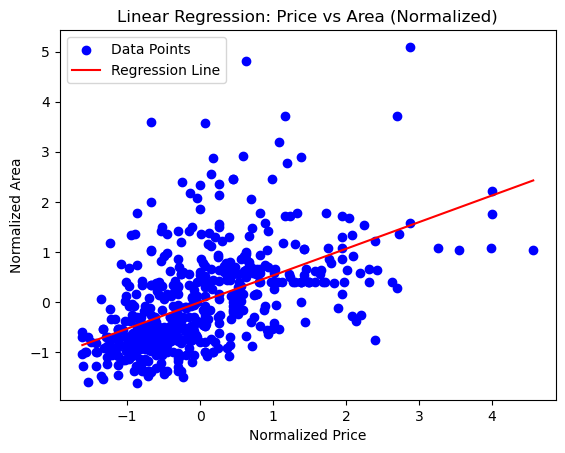

In [9]:
import matplotlib.pyplot as plt

# Step 1: Scatter plot of normalized data
plt.scatter(X, Y, color='blue', label='Data Points')  # X = normalized price, Y = normalized area

# Step 2: Regression line using normalized m, b
x = np.linspace(X.min(), X.max(), 100)
y_pred = m * x + b
plt.plot(x, y_pred, color='red', label='Regression Line')

# Labels and legend
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Area')
plt.title('Linear Regression: Price vs Area (Normalized)')
plt.legend()

plt.show()



In [10]:
# Input price to predict area for
price_input = 5000000

# Normalize input price
normalized_price = (price_input - price_mean) / price_std

# Predict normalized area
predicted_area_norm = m * normalized_price + b

# Denormalize predicted area
predicted_area = predicted_area_norm * area_std + area_mean

print(f"Predicted area for price ₹{price_input:,} is approximately {predicted_area:.2f} sq ft")


Predicted area for price ₹5,000,000 is approximately 5294.55 sq ft


In [11]:
 normalized_price = (5000000 - price_mean) / price_std
predicted_area_normalized = m * normalized_price + b
predicted_area = predicted_area_normalized * area_std + area_mean

predicted_area

5294.548236598385

In [12]:
data[['price', 'area']].corr()


,price,area
price,1.000000,0.535997
area,0.535997,1.000000


In [33]:
!git init                         # Initialize a new git repo
!git remote add origin https://github.com/Niirav213/linear_regression.git  # Connect to your repo
!git add regressiontrials.ipynb      # Add the file
!git commit -m "Initial commit"   # Commit the change
!git branch -M main               # Set main branch
!git push -u origin main          # Push to GitHub


usage: git init [-q | --quiet] [--bare] [--template=<template-directory>]
         [--separate-git-dir <git-dir>] [--object-format=<format>]
         [--ref-format=<format>]
         [-b <branch-name> | --initial-branch=<branch-name>]
         [--shared[=<permissions>]] [<directory>]
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [29]:
!git config --global user.name "Niirav213"
!git config --global user.email "np5662948@gmail.com"
